# Machine learning and metagenomics to study microbial communities

## Luis Pedro Coelho

- [@luispedrocoelho](https://twitter.com/luispedrocoelho)
- http://luispedro.org

## Microbial communities

_Definition_: A microbial community is just many small organisms living together.

Most often, we study _bacteria_ and _archea_ (prokaryotes, but some people do not like that word as it's not a monophyletic group).

Less often, microeukaryotes.

![Q](Q.png) What are the (wet-)lab tools to analyse microbial communities?

# Wetlab methods

- Sequencing
    - WGS (metagenomics)
    - Amplicon (16S, typically; but other genes too)
    - Transcriptomics
- Imaging
- Metaproteomics
- ...

The biggest reason why we study prokaryotes more than eukaryotes is that it's easier.

# Which environments are typically analysed?

- Host associated microbiomes (with clinical implications)
- Environmental samples (ocean, lakes, soil)
- Wastewater treatment plants
- Cheese
- ...

## Introduction to metagenomics analysis

(Most of this also applies to amplicon and metatranscriptomics sequencing)

1. Collect sample
2. Extract DNA (or RNA)
3. Perhaps more manipulations (amplicon, RNA -> cDNA, ...)
4. Send sample to sequencing centre
5. Sequencing happens
6. You get FASTQ files

#### Alternative pipeline

1. Download FASTQ files from ENA (EBI) or SRA

# Raw metagenomics data (FastQ Files)

- We cannot process metagenomics data in a 1-day course: too much computation, too many tools to introduce; not enough time.
- We can, however, do some functional data analysis if we start with preprocessed data.
- Still, let's discuss what can be done with these data and how they are processed in general.

# What does a FASTQ file look like?


    @HWI-D00647:25:C4P50ANXX:1:1101:1914:1994:0:N:0:AGGCAGAAAAGGCTAT
    TAAAAGCATCAAAGTTTTTATAAATTTTTTATCCAACTTAAACATTTTTTTCCTCCTAA
    +
    <>BGGGGGCGGGGGGGGGGG>GGGGGGGGGGGEGGGGEGGGGGGGGGGGGGG>GGBGGG
    @HWI-D00647:25:C4P50ANXX:1:1101:4595:1998:0:N:0:AGGCAGAAAAGGCTAT
    CTCTATCGCACGCTCCAGGCGCGCTATCCCCAGGCGATAATCGATGTGATGGCACCGGC
    +
    :>BGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGDGGGGFGGGGGGGGGGGGGGGG

![Q](Q.png)
How would you process these data?

# Gene catalog approach

![Gene catalog](./MOCAT_TARA.png)



Tools for this process:

- [MOCAT](http://vm-lux.embl.de/~kultima/MOCAT/)
- [ngless](https://ngless.rtfd.io)

# Existing catalogs

- Ocean
- Host-associated: human gut, mouse gut, pig gut, human skin
- ...

More will come in the future.

# Outputs of metagenomics processing

Feature tables: (sample x feature) 

- taxonomic: features are species abundances or genus abundance ...
- functional: features are gene groups, gene families


Note: all of these are **relative abundances**. Sequencing can never give you absolute abundances by itself.


It is the feature tables that are the input to the machine learning and other analyses.


# Problems

- [supervised] Colorectal cancer detection from fecal samples
- [unsupervised] Automated inference of species existence (mOTUs/CAGs/...)
- [supervised/unsupervised] As a **scientific tool** for relationship inferrence
- ...



# Colorectal Cancer (CRC) Detection

This section is based on work from ([Zeller et al., 2014](http://onlinelibrary.wiley.com/doi/10.15252/msb.20145645/abstract)).

Problem:

> Can we use the microbiome present in a fecal sample as a test for CRC?

Background:

- CRC has a low survival rate if detected late, but high if detected early enough
- Current tests are either invasive and uncomfortable (colonoscopy) or weak in power (occult blood tests).
- Some in vitro research had already hinted at a possible microbiome involvement

# Classification problem

1. Get samples from healthy individuals and patients
2. Generate data from both groups
3. Build a classifier

# Practical I

(These slides are adapted from Georg Zeller's work).

### Mechanics of Jupyter notebooks

- You can run this *cell* by typing CTRL+ENTER or from the menu.
- `?` after an object/function for help
- *Restart* when stuck

In [1]:
print("Hello World")

Hello World


You can run the cells out of order, but **variables** are preserved.

Another way of saying it is that you are manipulating an environment underneath

In [2]:
name = "Luis"

In [3]:
print("Hello {}".format(name))

Hello Luis


In [4]:
name = 'Anna'

In [5]:
import pandas as pd
import numpy as np

/nix/store/ndz4r710xbw8rj5g91n76nrkw1shdm4k-python2.7-matplotlib-2.0.2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Some basic imports

These are general imports for data analysis in Python

In [6]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn-white')


A magic command to make plots appear *inline*:

In [7]:
% matplotlib inline

In [8]:
from sklearn import metrics
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble

/nix/store/nbk9zj8kpgyzjabzxf2yya1v5zinmx03-python2.7-scikit-learn-0.19.0/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Getting the data

In [9]:
features = pd.read_table('http://www.bork.embl.de/~zeller/mlbc_data/FR-CRC_N114_feat_specIclusters.tsv')

In [10]:
print(features.shape)

(1754, 114)


In [11]:
features

,CCIS27304052ST-3-0,CCIS15794887ST-4-0,CCIS16561622ST-4-0,CCIS79210440ST-3-0,CCIS82507866ST-3-0,CCIS98482370ST-3-0,CCIS00281083ST-3-0,CCIS32452666ST-4-0,CCIS94417875ST-3-0,CCIS27927933ST-4-0,...,CCIS88007743ST-4-0,CCIS51595129ST-4-0,CCIS09568613ST-4-0,CCIS07539127ST-4-0,CCIS41692898ST-4-0,CCIS44093303ST-4-0,CCIS00146684ST-4-0,CCIS78100604ST-4-0,CCIS48174381ST-4-0,CCIS88317640ST-4-0
UNMAPPED,79082.683473,81853.405666,117405.355871,71157.452002,52682.752421,84132.149019,41644.859588,66822.073657,129563.779300,110146.784420,...,42914.243981,89241.975086,138238.561647,119779.117522,66247.224256,28792.834362,113600.263485,61491.206186,64769.653221,108496.634255
Methanoculleus marisnigri [h:1],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Methanococcoides burtonii [h:10],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Thermococcus kodakarensis [h:100],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Victivallis vadensis [h:1000],0.000000,0.000000,0.992403,0.000000,36.858255,0.000000,0.000000,0.000000,13.042339,0.000000,...,1.003101,31.267760,165.597819,0.000000,0.000000,0.000000,0.978909,0.000000,0.000000,0.000000
Gemmatimonas aurantiaca [h:1001],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fibrobacter succinogenes [h:1002],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
unnamed Verrucomicrobiae bacterium DG1235 [u:1003],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Opitutus terrae [h:1004],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Coraliomargarita akajimensis [h:1005],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Feature normalization

Here is what we do:

1. Convert to relative abundances
2. Remove low abundance features
3. Log transform the features
4. Whiten the data

![Q](Q.png) **Why?**

# Why convert to relative abundances?

Because the **number of sequences you obtain does not depend on any property of the sample**. It is purely technical.

In [12]:
features.sum()

CCIS27304052ST-3-0     139395.048868
CCIS15794887ST-4-0     119175.725209
CCIS16561622ST-4-0     199115.432321
CCIS79210440ST-3-0     113129.136279
CCIS82507866ST-3-0     111078.336128
CCIS98482370ST-3-0     119519.297687
CCIS00281083ST-3-0     107068.716306
CCIS32452666ST-4-0     128659.595982
CCIS94417875ST-3-0     155913.296244
CCIS27927933ST-4-0     329635.998257
CCIS45571137ST-3-0     102478.130241
CCIS81139242ST-4-0     153123.496044
CCIS21126322ST-4-0     218464.936935
CCIS17669415ST-4-0     149165.877991
CCIS29210128ST-4-0     113343.213270
CCIS48725289ST-4-0      87202.051593
CCIS64785924ST-20-0     30189.616683
CCIS03473770ST-4-0     121479.393260
CCIS10706551ST-3-0     177054.425751
CCIS64773582ST-4-0     201087.291137
CCIS06260551ST-3-0      84824.624925
CCIS40244499ST-3-0     125573.969493
CCIS85214191ST-3-0      98909.637581
CCIS87167916ST-4-0     166294.178092
CCIS58234805ST-4-0      62747.220333
CCIS91228662ST-4-0     214777.918154
CCIS71301801ST-4-0     183315.596016
C

In [13]:
features /= features.sum()

# Why remove low abundance features?

1. Removing some features is good for the classification (dimensionality reduction). **We are also doing this without looking at the classes** (i.e., unsupervised).
2. Low abundance features are noisier (when you are closer to the detection limit, you get to the Law of Small Numbers: _small groups have large variance_).

In [14]:
min_abundance = 1e-3
print("Nr features before filtering: {}".format(features.shape[0]))
features = features[features.max(1) > min_abundance]
print("Nr features after filtering: {}".format(features.shape[0]))


Nr features before filtering: 1754
Nr features after filtering: 208


# Unsupervised feature selection alternatives

- Use average value (mean instead of max) or prevalence (i.e., fraction > 0)
- Use the methods that you learned about yesterday

It is often a heuristic process in any case. They will give you similar results.

# Why log transform the features?

1. Variance normalization.
2. Biologically, we care about **fold changes** not about absolute changes.

# Variable normalization

In [15]:
features

,CCIS27304052ST-3-0,CCIS15794887ST-4-0,CCIS16561622ST-4-0,CCIS79210440ST-3-0,CCIS82507866ST-3-0,CCIS98482370ST-3-0,CCIS00281083ST-3-0,CCIS32452666ST-4-0,CCIS94417875ST-3-0,CCIS27927933ST-4-0,...,CCIS88007743ST-4-0,CCIS51595129ST-4-0,CCIS09568613ST-4-0,CCIS07539127ST-4-0,CCIS41692898ST-4-0,CCIS44093303ST-4-0,CCIS00146684ST-4-0,CCIS78100604ST-4-0,CCIS48174381ST-4-0,CCIS88317640ST-4-0
UNMAPPED,0.567328,0.686830,0.589635,0.628993,0.474285,7.039210e-01,0.388955,5.193711e-01,0.830999,0.334147,...,0.293159,0.621392,0.647848,0.663865,0.378497,0.222275,0.632551,0.315295,0.542994,0.509499
Victivallis vadensis [h:1000],0.000000,0.000000,0.000005,0.000000,0.000332,0.000000e+00,0.000000,0.000000e+00,0.000084,0.000000,...,0.000007,0.000218,0.000776,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000
Akkermansia muciniphila [h:1008],0.010640,0.000009,0.001264,0.003678,0.000018,0.000000e+00,0.001928,6.099725e-05,0.008503,0.002783,...,0.001635,0.000020,0.005652,0.000787,0.000000,0.000000,0.007295,0.000000,0.003038,0.000005
Alistipes shahii [h:1052],0.001635,0.000406,0.003054,0.000953,0.004088,9.694720e-04,0.000621,2.364033e-03,0.000858,0.000113,...,0.018335,0.001154,0.002130,0.002454,0.004838,0.004971,0.008051,0.003940,0.001979,0.000963
unnamed Alistipes sp. HGB5 [u:1053],0.000083,0.000437,0.002342,0.000687,0.000214,1.321628e-04,0.001105,3.781336e-05,0.000390,0.000012,...,0.000401,0.000088,0.005805,0.002996,0.003848,0.000077,0.000011,0.000083,0.000107,0.001159
Alistipes putredinis [h:1054],0.014727,0.000035,0.022603,0.014441,0.011945,4.376832e-03,0.014867,1.682861e-02,0.003042,0.000051,...,0.000055,0.004790,0.010791,0.013129,0.020186,0.015682,0.040787,0.007722,0.001726,0.003954
Porphyromonas asaccharolytica [h:1056],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000037
Porphyromonas uenonis [h:1057],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000006,0.000000,...,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000
Prevotella nigrescens [h:1069],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Prevotella denticola [h:1072],0.000000,0.000000,0.000000,0.000000,0.000000,3.241409e-05,0.000012,7.389463e-06,0.000004,0.000000,...,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


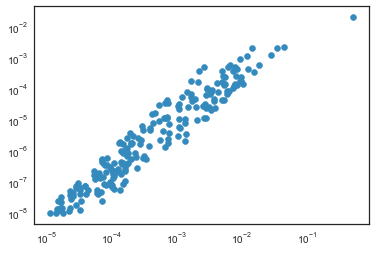

In [16]:
fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.scatter(features.mean(1),features.var(1))


# Log transforming the data

![Q](Q.png)

What is the big issue with log-transforms?

What to do about zeros in the counts table?

Empirical pseudo-count: use one order of magnitude smaller than the smallest detected value.

In [17]:
pseudo_count = features.values[features.values > 0].min()/10.
features = np.log10(pseudo_count + features)

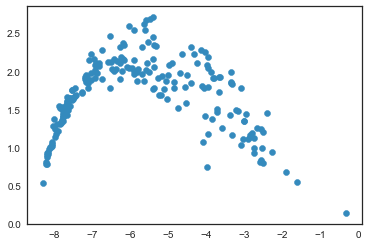

In [18]:
fig,ax = plt.subplots()
ax.scatter(features.mean(1), features.std(1))

Not, perfect, but look at the Y-axis scale: 0-3 (previously, it was over several orders of magnitude).

# Whitening the data

Finally, we "whiten" the data: remove the mean and make the standard deviation be 1.

In [19]:
features = features.T
features = (features - features.mean(0))/features.std(0)

Note we also transposed the matrix to a more natural format.

# Now, can we use a classifier to identify cancerous samples?

In [20]:
labels = pd.read_table('http://www.bork.embl.de/~zeller/mlbc_data/FR-CRC_N114_label.tsv',
                               index_col=0, header=None, squeeze=True)
print(labels)

0
CCIS27304052ST-3-0    -1
CCIS15794887ST-4-0    -1
CCIS16561622ST-4-0    -1
CCIS79210440ST-3-0    -1
CCIS82507866ST-3-0    -1
CCIS98482370ST-3-0    -1
CCIS00281083ST-3-0    -1
CCIS32452666ST-4-0    -1
CCIS94417875ST-3-0    -1
CCIS27927933ST-4-0    -1
CCIS45571137ST-3-0    -1
CCIS81139242ST-4-0    -1
CCIS21126322ST-4-0    -1
CCIS17669415ST-4-0     1
CCIS29210128ST-4-0    -1
CCIS48725289ST-4-0     1
CCIS64785924ST-20-0   -1
CCIS03473770ST-4-0    -1
CCIS10706551ST-3-0    -1
CCIS64773582ST-4-0    -1
CCIS06260551ST-3-0     1
CCIS40244499ST-3-0     1
CCIS85214191ST-3-0     1
CCIS87167916ST-4-0     1
CCIS58234805ST-4-0     1
CCIS91228662ST-4-0     1
CCIS71301801ST-4-0     1
CCIS53355328ST-4-0     1
CCIS41222843ST-4-0     1
CCIS81887263ST-4-0     1
                      ..
CCIS02856720ST-4-0    -1
CCIS07648107ST-4-0    -1
CCIS34604008ST-4-0    -1
CCIS63468405ST-4-0    -1
CCIS16383318ST-4-0    -1
CCIS36699628ST-4-0    -1
CCIS95409808ST-4-0    -1
CCIS74239020ST-4-0    -1
CCIS05314658ST-4-0    -

In [21]:
raw_features = features
raw_labels = labels

features = raw_features.values
labels = raw_labels.values

In [22]:
features

array([[ 0.46563479, -0.74481671,  0.91154906, ...,  0.20023286,
         0.40298813,  0.39264468],
       [ 1.04639213, -0.74481671, -0.50341204, ...,  0.96096296,
         0.3730272 ,  1.63853631],
       [ 0.58280736,  0.7357094 ,  0.48887373, ..., -0.67143104,
        -0.51884139, -1.17892042],
       ..., 
       [-1.31911529, -0.74481671, -2.00925825, ...,  0.1877297 ,
         1.35509955,  1.25404391],
       [ 0.33243982, -0.74481671,  0.66283805, ..., -0.5637521 ,
        -0.18294858, -1.17892042],
       [ 0.13899591, -0.74481671, -0.62182288, ...,  1.24531988,
         1.1156768 ,  0.95205164]])

In [23]:
rf = ensemble.RandomForestClassifier(n_estimators=101)
prediction = cross_validation.cross_val_predict(rf, features, labels)

In [24]:
cross_validation.cross_val_score?

In [25]:
(prediction == labels).mean()

0.7807017543859649

![Q](Q.png) Actually, we did not need to normalize the features for a random forest! Why? 

# Let's try other classifiers

What about a penalized logistic regression?

In [26]:
clf = linear_model.LogisticRegressionCV()
lg_predictions = cross_validation.cross_val_predict(clf, features, labels)

In [27]:
print((lg_predictions == labels).mean())

0.780701754386


In [28]:
lg_predictions

array([-1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1])

# Can we get a soft prediction?

Instead of just "the best guess", often it is useful to 

In [29]:
lg_predictions = np.zeros(len(labels), float)
for train, test in cross_validation.KFold(len(labels), n_folds=3, shuffle=True):
    clf.fit(features[train], labels[train])
    lg_predictions[test] = clf.predict_proba(features[test]).T[0]

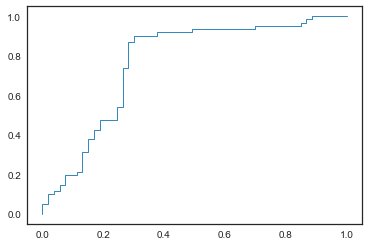

In [30]:
lg_fpr, lg_tpr,_ = metrics.roc_curve(labels, lg_predictions)
fig,ax = plt.subplots()
ax.plot(lg_tpr, lg_fpr)


![Q](Q.png) Do you understand what the curve above is?

# ROC Curves

X-axis: false positive rate, (1 -specificity), (how many objects that are classified as positive are actually negative?)

Y-axis: sensitivity, recall, true positive rate (how many objects that are positive are indeed classified as positive?)

## Alternative way to think about it:

1. Order all the examples by the classifier
2. Start at (0,0)
3. Go down the list of examples as ordered by the classifier
    - if true, go up
    - if false, go right

Not all errors are the same: context matters.

# Area under the curve

AUC: 0.767089390659


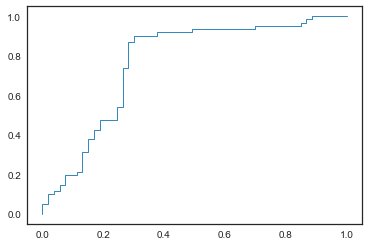

In [31]:
fpr, tpr,_ = metrics.roc_curve(labels, lg_predictions)
auc_roc = metrics.roc_auc_score(labels, -lg_predictions)
fig,ax = plt.subplots()
ax.plot(tpr, fpr)
print("AUC: {}".format(auc_roc))

# Biomarker discovery

We can use these models for biomarker discovery:

We use the models to infer which features are important (you probably talked about this yesterday).

Many classifiers can also output a feature relevance measure.

# Lasso is sparse


Blackboard diagram:

# Lasso in scikit-learn

In [32]:
clf = linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=100)

In [33]:
clf.fit(features, labels)

LogisticRegressionCV(Cs=100, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [34]:
feature_values = pd.Series(np.abs(clf.coef_).ravel(), index=raw_features.columns)

In [35]:
feature_values.sort_values(inplace=True)

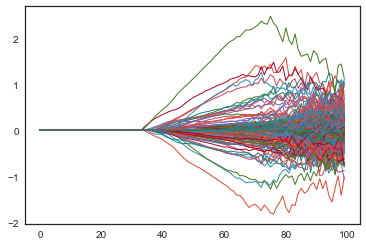

In [36]:
fig,ax = plt.subplots()
_=ax.plot(clf.coefs_paths_[1].mean(0))

In [37]:
feature_values

UNMAPPED                                                    0.000000
Peptoniphilus lacrimalis [h:1492]                           0.000000
Citrobacter youngae [h:393]                                 0.000000
unnamed Citrobacter sp. 30_2 [u:392]                        0.000000
Parvimonas micra [h:1505]                                   0.000000
unnamed Parvimonas sp. oral taxon 393 [u:1507]              0.000000
Peptostreptococcus anaerobius [h:1531]                      0.000000
Klebsiella variicola/pneumoniae [c:399]                     0.000000
[Clostridium] difficile [h:1532]                            0.000000
Clostridium perfringens [h:1540]                            0.000000
Clostridium perfringens [h:1541]                            0.000000
Clostridium butyricum [h:1543]                              0.000000
unnamed Clostridium sp. 7_2_43FAA [u:1545]                  0.000000
Eubacterium siraeum [h:1564]                                0.000000
Ruminococcus champanellensis [h:15

# Comparing classifiers

So, which classifier is better?

Let's run the same evaluation scheme as before:

In [38]:
rf = ensemble.RandomForestClassifier(n_estimators=101)
lasso_predictions = np.zeros(len(labels), float)
rf_predictions = np.zeros(len(labels), float)
for train, test in cross_validation.KFold(len(labels), n_folds=3, shuffle=True):
    clf.fit(features[train], labels[train])
    lasso_predictions[test] = clf.predict_proba(features[test]).T[0]
    rf.fit(features[train], labels[train])
    rf_predictions[test] = rf.predict_proba(features[test]).T[0]
  

Logistic regression (L2) AUC: 0.767089390659
Logistic regression (L1) AUC: 0.833591091865
RF AUC: 0.839004021033


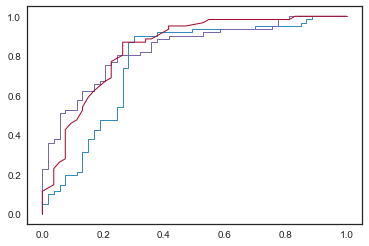

In [39]:
fig,ax = plt.subplots()

lg_fpr, lg_tpr,_ = metrics.roc_curve(labels, lg_predictions)
lg_auc_roc = metrics.roc_auc_score(labels, -lg_predictions)
ax.plot(lg_tpr, lg_fpr)
print("Logistic regression (L2) AUC: {}".format(lg_auc_roc))


la_fpr, la_tpr,_ = metrics.roc_curve(labels, lasso_predictions)
la_auc_roc = metrics.roc_auc_score(labels, -lasso_predictions)
ax.plot(la_tpr, la_fpr)
print("Logistic regression (L1) AUC: {}".format(la_auc_roc))

rf_fpr, rf_tpr,_ = metrics.roc_curve(labels, rf_predictions)
rf_auc_roc = metrics.roc_auc_score(labels, -rf_predictions)
ax.plot(rf_tpr, rf_fpr)
print("RF AUC: {}".format(rf_auc_roc))

# For a classifier, use Random Forests

Which classifier should I use?

For small to moderate sized problems, use Random Forests.

- _Do we Need Hundreds of Classifiers to Solve Real World Classification Problems?_ Manuel Fernández-Delgado, Eva Cernadas, Senén Barro, Dinani Amorim in [JMLR](http://www.jmlr.org/papers/v15/delgado14a.html)
- _I TRIED A BUNCH OF THINGS: THE DANGERS OF UNEXPECTED OVERFITTING IN CLASSIFICATION_ by Michael Skocik, John Collins, Chloe Callahan-Flintoft, Howard Bowman [BioRXiv preprint](http://biorxiv.org/content/early/2016/10/03/078816)

Other classifiers can have some advantages: Lasso is sparse, for example.

Let's continue looking at using the Lasso for biomarker discovery:

# Increasing the penalty makes the model sparser

We can also think of it as "decreasing the budget" of the classifier.

In [40]:
clf = linear_model.LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
clf.fit(features, labels)
feature_values = pd.Series(np.abs(clf.coef_).ravel(), index=raw_features.columns)
feature_values.sort_values(inplace=True)
feature_values

UNMAPPED                                                                         0.000000
Coprococcus catus [h:1594]                                                       0.000000
butyrate-producing bacterium [c:1595]                                            0.000000
Anaerostipes caccae [h:1596]                                                     0.000000
Eubacterium hallii [h:1597]                                                      0.000000
Clostridium bolteae [h:1598]                                                     0.000000
unnamed Clostridiales bacterium 1_7_47FAA [u:1599]                               0.000000
Clostridium symbiosum [h:1600]                                                   0.000000
Clostridium saccharolyticum [h:1601]                                             0.000000
unnamed butyrate-producing bacterium SS3/4 [u:1603]                              0.000000
Dorea formicigenerans [h:1604]                                                   0.000000
unnamed Cl

# Lasso is not very stable

Lasso is _winner takes all_.

Back to blackboard:

In [41]:
clf = linear_model.LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

fvalues = []
for _ in range(100):
    selected  = (np.random.random(len(features)) < 0.9)
    clf.fit(features[selected], labels[selected])
    feature_values = pd.Series(np.abs(clf.coef_).ravel(), index=raw_features.columns)
    fvalues.append(feature_values)
fvalues = pd.concat(fvalues, axis=1)

With the code above, we try the Lasso 100 times on different parts of the data (getting ~90% each time).

In [42]:
frac_selected =(fvalues > 0).mean(1)
frac_selected.sort_values(inplace=True)
frac_selected

UNMAPPED                                                                         0.00
Faecalibacterium prausnitzii [h:1575]                                            0.00
Faecalibacterium prausnitzii [h:1576]                                            0.00
unnamed Ruminococcaceae bacterium D16 [u:1580]                                   0.00
Eubacterium limosum [h:1582]                                                     0.00
Coprococcus eutactus [h:1592]                                                    0.00
unnamed Clostridium sp. L2-50 [u:1593]                                           0.00
Coprococcus catus [h:1594]                                                       0.00
Anaerostipes caccae [h:1596]                                                     0.00
unnamed Clostridiales bacterium 1_7_47FAA [u:1599]                               0.00
Clostridium symbiosum [h:1600]                                                   0.00
Clostridium saccharolyticum [h:1601]                  

# Final notes on CRC

- There is no causality model.
    - Maybe the tumour is a good environment for certain microbes
    - Maybe certain microbes cause cancer
    - Maybe people with subclinical symptoms subtly change their diet
    
The two first hypotheses are much more likely, but we cannot rule out the third.

# Tutorial 2

Load the metadata (sheet index 8 is the right one). The original data is at [http://ocean-microbiome.embl.de/companion.html](http://ocean-microbiome.embl.de/companion.html).


In [43]:
tara_data = pd.read_excel('http://ocean-microbiome.embl.de/data/OM.CompanionTables.xlsx', sheetname=['Table W1', 'Table W8'], index_col=0)

In [44]:
meta = tara_data['Table W8']
meta

,Mean_Date [YY/MM/DD hh:mm]*,Mean_Lat*,Mean_Long*,Mean_Depth [m]*,Mean_Temperature [deg C]*,Mean_Salinity [PSU]*,Mean_Oxygen [umol/kg]*,Mean_Nitrates[umol/L]*,NO2 [umol/L]**,PO4 [umol/L]**,...,miTAG.SILVA.ace,miTAG.SILVA.Shannon,OG.Shannon,OG.Richness,OG.Evenness,FC - heterotrophs [cells/mL],FC - autotrophs [cells/mL],FC - bacteria [cells/mL],FC - picoeukaryotes [cells/mL],minimum generation time [h]
PANGAEA Sample ID,,,,,,,,,,,,,,,,,,,,,
TARA_B100000965,2011-04-15 13:10:00,-12.994483,-95.985500,57.622514,20.649431,35.544655,216.790338,1.501977,0.160,0.780,...,4229.796196,6.829191,7.247579,18464.5,0.737772,3.842760e+05,116140.61050,5.004166e+05,4501.337079,13.646311
TARA_B100000959,2011-04-16 16:09:00,-12.931623,-96.118510,175.256800,13.014573,34.840218,0.708430,21.068385,0.030,2.680,...,4685.670783,6.678287,7.230797,17447.9,0.740331,3.053193e+05,0.00000,3.053193e+05,0.000000,25.773105
TARA_B100000963,2011-04-15 13:10:00,-12.994483,-95.985500,5.479000,25.251200,35.835267,200.233917,4.590737,0.140,0.680,...,3458.745515,6.603492,7.165956,14283.0,0.749042,4.642672e+05,155789.06000,6.200562e+05,7779.900079,14.384453
TARA_B100000902,2011-04-22 19:51:00,-5.269667,-85.228733,45.659026,19.566255,34.900284,103.916711,20.328327,1.200,1.860,...,4111.077629,6.781489,7.171533,15878.3,0.741420,1.071414e+06,246946.86760,1.318361e+06,13381.733830,11.548857
TARA_B100000953,2011-04-22 14:16:00,-5.266542,-85.223467,475.619375,9.195825,34.692550,4.425250,40.008967,0.010,2.850,...,4642.517260,6.680479,7.187370,17457.4,0.735844,1.620192e+05,0.00000,1.620192e+05,0.000000,26.636844
TARA_B100000900,2011-04-21 20:16:00,-5.252333,-85.160983,5.478500,24.943108,34.748175,205.992583,11.688971,0.320,1.000,...,3092.856531,6.615300,7.134150,13566.0,0.749754,1.032721e+06,192334.72030,1.225056e+06,19090.560310,12.206568
TARA_R100001510,2011-05-13 00:00:00,2.076667,-84.520283,29.806808,26.532035,34.344808,203.127654,3.886605,0.110,0.500,...,NaN,NaN,NaN,NaN,NaN,8.242806e+05,155101.24960,9.793819e+05,4967.519697,NaN
TARA_B100000927,2011-05-13 00:00:00,2.076667,-84.520283,29.806808,26.532035,34.344808,203.127654,3.886605,0.110,0.500,...,3450.644848,6.675707,7.166900,15374.4,0.743419,8.242806e+05,155101.24960,9.793819e+05,4967.519697,13.326492
TARA_B100000929,2011-05-13 19:44:00,2.065494,-84.542422,376.367333,11.315800,34.799850,2.516667,33.915981,0.020,2.580,...,4926.656332,6.832155,7.292705,18991.5,0.740245,1.374867e+05,0.00000,1.374867e+05,0.000000,18.309217


Remove the non-data lines at the bottom:

In [45]:
meta = meta.select(lambda ix: ix.startswith('TARA'))

Now, we need to do some ID manipulation

(Let's look at the tables in the supplement first, before we look at this obscure code)

In [46]:
samples = tara_data['Table W1']
pangea = samples['PANGAEA sample identifier']
meta.index = meta.index.map(dict([(p,t) for t,p in pangea.to_dict().items()]).get)

A lot of bioinformatics is just converting file types and identifiers.

We are going to focus on the surface samples, in the prokaryotic size fraction:

In [47]:
meta = meta.select(lambda sid: '_SRF_' in sid)
meta = meta.select(lambda sid: '0.22-3' in sid or '0.22-1.6' in sid)

# Taxonomic tables

In [48]:
raw_mOTUs = pd.read_table('http://ocean-microbiome.embl.de/data/mOTU.linkage-groups.relab.release.tsv',
                      index_col=0)
mOTUs = raw_mOTUs.copy()

URLError: <urlopen error [Errno 110] Connection timed out>

Get just the relevant rows:

In [ ]:
mOTUs

In [ ]:
mOTUs = mOTUs[meta.index]

In [ ]:
mOTUs.shape

Select abundant ones

In [ ]:
mOTUs = mOTUs[mOTUs.max(1) > 1e-2]

In [ ]:
(mOTUs > 0).mean().mean()

Transpose

In [ ]:
mOTUs = mOTUs.T

In [ ]:
print(mOTUs.shape)

# PCA Plot

- Principal component analysis (PCA)
- Principal coordinate analysis (PCoA)
- Multidimensional analysis (MDS)
- Multidimensional non-euclidean analysis

I.e., if $x_i$, $x_j$ are the original (high dimensional) vectors, and $p_i$, $p_j$ are their transformed counterparts (low dimensional), then

$|x_i - x_j| \approx |p_i - p_j|$

PCA is one of the simplest methods, very classical (matrix operations) and very deep (shows up in many forms). 

[Wikipedia article on PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)

![PCA](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/330px-GaussianScatterPCA.svg.png)

# PCA in scikit-learn

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(2)

We can perform it in a single call:

In [ ]:
pca_decomp = pca.fit_transform(mOTUs)

In [ ]:
fig,ax = plt.subplots()
ax.scatter(pca_decomp.T[0], pca_decomp.T[1], s=60)

# Adding metadata to the plot

In [ ]:
regions = samples['Ocean and sea regions (IHO General Sea Areas 1953) [MRGID registered at www.marineregions.com]']
regions = regions.reindex(meta.index)
regions = pd.Categorical(regions)

In [ ]:
COLORS = np.array([
    '#7fc97f',
    '#beaed4',
    '#fdc086',
    '#ffff99',
    '#386cb0',
    '#f0027f',
    '#bf5b17',
    '#666666',    
])

In [ ]:
fig,ax = plt.subplots()
ax.scatter(pca_decomp.T[0], pca_decomp.T[1], c=COLORS[regions.codes],s=60)

Hmm. We "forgot" to log transform.

What is the largest feature?

In [ ]:
mOTUs.mean()

In [ ]:
fig,ax = plt.subplots()
ax.scatter(pca_decomp.T[0], mOTUs['unassigned'], c=COLORS[regions.codes],s=60)

So, yeah, without log-normalization, PC1 is almost completely determined by the single largest element.

In our case, this is even worse, because the largest element is the unassigned fraction!

In [ ]:
pc = mOTUs.values[mOTUs.values > 0].min() / 10.
mOTUs = np.log10(mOTUs + pc)

In [ ]:
pca_decomp = pca.fit_transform(mOTUs)
fig,ax = plt.subplots()
ax.scatter(pca_decomp.T[0], pca_decomp.T[1], c=COLORS[regions.codes],s=60)

# Explained variance in PCA

It is, in general, impossible to get a perfect low dimensional representation of a high dimensional space

In [ ]:
pca_decomp = pca.fit_transform(mOTUs)
fig,ax = plt.subplots()
ax.scatter(pca_decomp.T[0], pca_decomp.T[1], c=COLORS[regions.codes],s=60)
ax.set_xlabel('Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[0]))
ax.set_ylabel('Explained variance: {:.1%}'.format(pca.explained_variance_ratio_[1]))

You **always want to the explained variance**.

Ideally, 50% or more should be explained by the two axes.

# Correlation of temperature with PC1

In [ ]:
fig,ax = plt.subplots()
temperature = meta['Mean_Temperature [deg C]*']
ax.scatter(temperature, pca_decomp.T[0])

We can check with standard statistics that this is indeed a strong correlation:

In [ ]:
from scipy import stats
stats.spearmanr(temperature, pca_decomp.T[0])

# How about predicting temperature?



### Regression, not classification

We are predicting a continuous output, not just a single class.

# Elastic net regression

OLS: $\beta = \arg\min | \beta X - y |^2$

Lasso: $\beta = \arg\min | \beta X - y |^2 + \alpha |\sum_i\beta_i|$

Ridge: $\beta = \arg\min | \beta X - y |^2 + \alpha |\sum_i\beta_i|^2$

Elastic net: $\beta = \arg\min | \beta X - y |^2 + \alpha_1 |\sum_i\beta_i| + \alpha_2 |\sum_i\beta_i|^2$

Ideally, elastic net is a "soft Lasso": still sparse, but not as greedy.

**If you just want a regression method, _use elastic nets_.**

# Feature normalization

We use much of the same procedure as before, except we used _a different normalization_: rank transform.
    

In [ ]:
from scipy import stats
ranked = np.array([stats.rankdata(mOTUs.iloc[i]) for i in range(len(mOTUs))])

In [ ]:
predictor = linear_model.ElasticNetCV(n_jobs=4)

cv = cross_validation.LeaveOneOut(len(temperature))
prediction = cross_validation.cross_val_predict(predictor, ranked, temperature, cv=cv)

In [ ]:
fig,ax = plt.subplots()
ax.scatter(temperature, prediction)
ax.plot([0,30], [0,30], 'k:')

In [ ]:
print("R2: {}".format(metrics.r2_score(temperature, prediction)))

In [ ]:
predictor

# R² as a measure of prediction

- R²_CV_ or R² or Q² or Coefficient of Determination: nomenclature is not 100% standard.
- It's variance explained.
- Alternatively: it's the improvement over a _null model_.

It can be negative!


$R^2 = 1 - \frac{\sum_i | y_i - \hat{y}_i|^2}{\sum_i |y_i - \bar{y}|^2}$

It can be very sensitive to outliers!

# What about spatial auto-correlation?

![Q](Q.png) What is spatial auto-correlation?

![Q](Q.png) How do we solve the issue of spatial auto-correlation?

# Cross-validation as a solution to auto-correlations

- Cross-validation can be a very powerful scientific tool

http://luispedro.org/files/Coelho2013_Bioinformatics_extra/crossvalidation.html

In [ ]:
cv = cross_validation.LeaveOneLabelOut(labels=regions)
prediction = cross_validation.cross_val_predict(predictor, ranked, temperature, cv=cv)
print("R2: {}".format(metrics.r2_score(temperature, prediction)))

In [ ]:
fig, ax = plt.subplots()
ax.scatter(temperature, prediction)
ax.plot([0,30], [0,30],'k:')

# Regression to the mean in penalized linear models

Models will often regress to the mean.

This is OK.

# Be very careful with group/batch effects

- They are pervasive
- They can kill your generalization
- They can trick you into thinking your system works better than it does


References

- _Determining the subcellular location of new proteins from microscope images using local features_ by Coelho et al. (2013) Bioinformatics [DOI: 10.1093/bioinformatics/btt392](http://bioinformatics.oxfordjournals.org/content/29/18/2343.short)
- _Assessing and tuning brain decoders: Cross-validation, caveats, and guidelines_ by Varoquaux et al. NeuroImage (2016) [DOI: 10.1016/j.neuroimage.2016.10.038](http://www.sciencedirect.com/science/article/pii/S105381191630595X)


# Problem: can we build a model that can generalize across studies?

Big issues

- Not the same technology (Illumina vs 454 and different library preps)
- Not the same sequencing depth

![Q](Q.png) Suggestions?

Here is what we did:

1. Downsample (randomly) our data to the GOS depth
2. Only used presences/absence (encoded as 0.0/1.0)

Worked well.